<a href="https://colab.research.google.com/github/shekar9801/Deep-Learning-with-Pytorch/blob/main/cnn_using_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

In [2]:
# Convert MNIST Images files into a tensor of 4-dimension(Height, widht, channels)

transform = transforms.ToTensor()

In [3]:
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 507kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.66MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.55MB/s]


In [4]:
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)

In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
pwd

'/content'

In [8]:
ls

data/  sample_data/


In [9]:
cd ./data/MNIST/raw/

/content/data/MNIST/raw


In [10]:
ls

t10k-images-idx3-ubyte     train-images-idx3-ubyte
t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte     train-labels-idx1-ubyte
t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte.gz


In [11]:
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(train_data, batch_size=10, shuffle=False)

In [12]:
# Create model

conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=1, padding=1)
pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1, padding=1)
pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

In [13]:
for images, labels in train_loader:
    print(images.shape)
    break

torch.Size([10, 1, 28, 28])


In [14]:
x = F.relu(conv1(images))
x = pool1(x)
x = F.relu(conv2(x))
x = pool2(x)


In [15]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=1, padding=1)
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1, padding=1)
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.fc1 = nn.Linear(in_features=7*7*16, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=84)
    self.fc3 = nn.Linear(in_features=84, out_features=10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool1(x)
    x = F.relu(self.conv2(x))
    x = self.pool2(x)
    x = x.reshape(-1, 7*7*16)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return F.log_softmax(x, dim=1)




In [16]:
torch.manual_seed(101)
model = Model()
model

Model(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [18]:
import time
start_time = time.time()

epochs = 5
train_losses = []
train_correct = []

test_losses = []
test_correct = []

for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  for b, (X_train, y_train) in enumerate(train_loader):
    b+=1

    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    predicted = torch.max(y_pred.data, 1)[1]
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if b%1000 == 0:
      print(f'epoch: {i}  batch: {b}  loss: {loss.item():.2f}  accuracy: {trn_corr.item()*100/(10*b):.2f}%')

    train_losses.append(loss)
    train_correct.append(trn_corr)


current_time = time.time()
print((current_time - start_time)/60, 'minutes')

epoch: 0  batch: 1000  loss: 0.05  accuracy: 79.66%
epoch: 0  batch: 2000  loss: 0.09  accuracy: 86.98%
epoch: 0  batch: 3000  loss: 0.07  accuracy: 89.88%
epoch: 0  batch: 4000  loss: 0.22  accuracy: 91.58%
epoch: 0  batch: 5000  loss: 0.06  accuracy: 92.65%
epoch: 0  batch: 6000  loss: 0.01  accuracy: 93.41%
epoch: 1  batch: 1000  loss: 0.00  accuracy: 97.47%
epoch: 1  batch: 2000  loss: 0.00  accuracy: 97.71%
epoch: 1  batch: 3000  loss: 0.42  accuracy: 97.84%
epoch: 1  batch: 4000  loss: 0.14  accuracy: 97.88%
epoch: 1  batch: 5000  loss: 0.01  accuracy: 97.98%
epoch: 1  batch: 6000  loss: 0.29  accuracy: 98.00%
epoch: 2  batch: 1000  loss: 0.00  accuracy: 98.56%
epoch: 2  batch: 2000  loss: 0.00  accuracy: 98.47%
epoch: 2  batch: 3000  loss: 0.03  accuracy: 98.51%
epoch: 2  batch: 4000  loss: 0.29  accuracy: 98.52%
epoch: 2  batch: 5000  loss: 0.17  accuracy: 98.51%
epoch: 2  batch: 6000  loss: 0.00  accuracy: 98.53%
epoch: 3  batch: 1000  loss: 0.01  accuracy: 99.06%
epoch: 3  ba

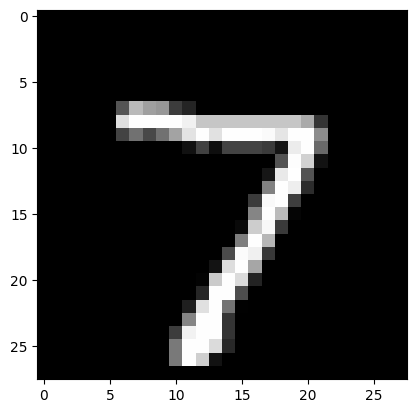

In [21]:
plt.imshow(test_data[0][0].reshape(28, 28), cmap='gray')

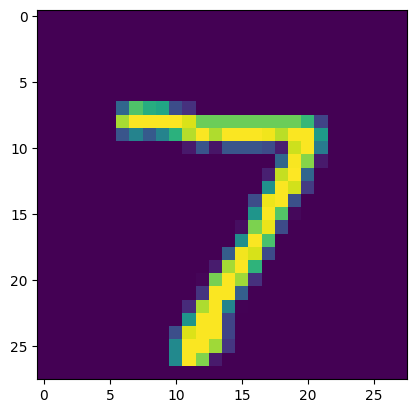

In [22]:
plt.imshow(test_data[0][0].reshape(28, 28))

In [19]:
# Test model on unkwon data

model.eval()
with torch.no_grad():
  new_prediction = model(test_data[0][0].view(1, 1, 28, 28))

  print(new_prediction.argmax())

tensor(7)
